## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
import plotly.express as px
from plotly.offline import iplot
import plotly as py
cf.go_offline()
py.offline.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [4]:
data_train = pd.read_csv("train.csv")

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Filling Null Values

In [6]:
null_percent = []
for i in data_train.columns:
    percent = (data_train[i].isnull().sum()/1460)*100
    null_percent.append(percent)

In [7]:
len(null_percent)

81

In [8]:
null_values = pd.DataFrame({'features' : data_train.columns, 'percentage' : null_percent})
null_values[null_values['percentage'] > 0]

,features,percentage
3,LotFrontage,17.739726
6,Alley,93.767123
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
30,BsmtQual,2.534247
31,BsmtCond,2.534247
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
35,BsmtFinType2,2.602740
42,Electrical,0.068493


In [8]:
#droping Alley PoolQC , Fence,MiscFeature  --they have null values more than 75 percent

In [9]:
house_train = data_train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [10]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
null_values[(null_values['percentage'] > 5 )&(null_values['percentage'] < 50)]

,features,percentage
3,LotFrontage,17.739726
57,FireplaceQu,47.260274
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945


In [12]:
house_train['MasVnrType'].fillna(house_train['MasVnrType'].mode()[0],axis = 0,inplace = True)

In [13]:
house_train['MasVnrArea'].fillna(house_train['MasVnrArea'].mean(),inplace = True)

In [14]:
house_train['BsmtQual'].fillna(house_train['BsmtQual'].mode()[0],inplace = True)
house_train['BsmtCond'].fillna(house_train['BsmtCond'].mode()[0],inplace = True)

In [15]:
house_train['BsmtExposure'].fillna(house_train['BsmtExposure'].mode()[0],inplace = True)
house_train['BsmtFinType1'].fillna(house_train['BsmtFinType1'].mode()[0],inplace = True)
house_train['BsmtFinType2'].fillna(house_train['BsmtFinType2'].mode()[0],inplace = True)

In [16]:
house_train['BsmtFinSF2'].fillna(house_train['BsmtFinSF2'].mode()[0],inplace = True)

In [17]:
house_train['Electrical'].fillna(house_train['Electrical'].mode()[0],inplace = True)

In [18]:
house_train['LotFrontage'].fillna(house_train['LotFrontage'].mean(),inplace = True)

In [19]:
house_train['FireplaceQu'].fillna(house_train['FireplaceQu'].mode()[0],inplace = True)

In [20]:
house_train['GarageType'].fillna(house_train['GarageType'].mode()[0],inplace = True)

In [21]:
house_train.drop(labels='GarageYrBlt',inplace = True,axis = 1)

In [22]:
house_train['GarageFinish'].fillna(house_train['GarageFinish'].mode()[0],inplace = True)

In [23]:
house_train['GarageQual'].fillna(house_train['GarageQual'].mode()[0],inplace = True)
house_train['GarageCond'].fillna(house_train['GarageCond'].mode()[0],inplace = True)

In [24]:
house_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

## EDA

#### Sale Price Histogram

In [28]:
house_train['SalePrice'].iplot(kind = 'hist',bins = 75,layout = {'height':500,'width':800}) 

<AxesSubplot:>

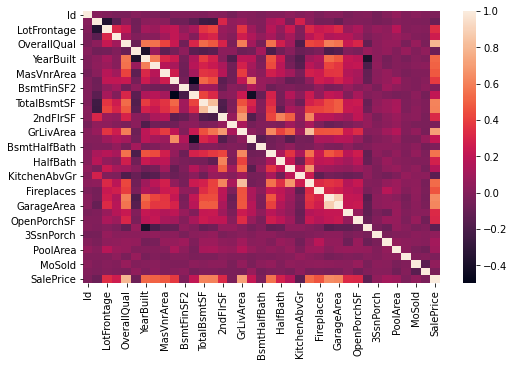

In [31]:
plt.figure(figsize = (8,5))
sns.heatmap(house_train.corr())

## Relation Between Sale Price and other Numerical Features(continues)

In [33]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [34]:
numerical_feature = [x for x in house_train.columns if house_train[x].dtype != 'O']
## delete discrete features like year ,id

In [35]:
discrete = ['Id','YearBuilt','YearRemodAdd','YrSold']

In [36]:
numerical_feature2 = [x for x in numerical_feature if x not in discrete]

In [37]:
#removing discrete features in numerical feature
numerical_cont = [x for x in numerical_feature2 if len(house_train[x].unique())>20]

In [38]:
len(numerical_cont)

18

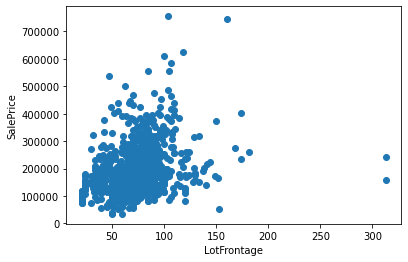

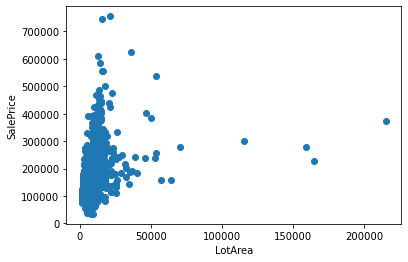

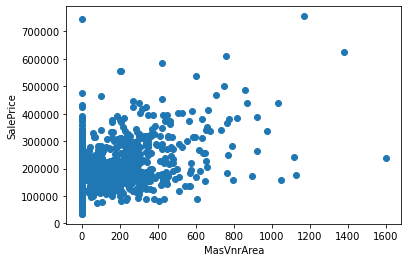

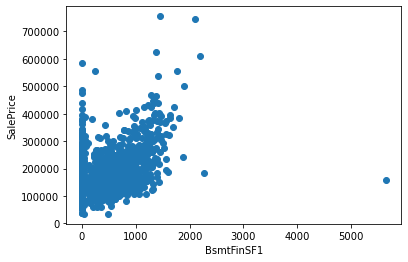

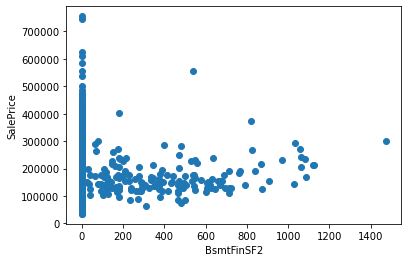

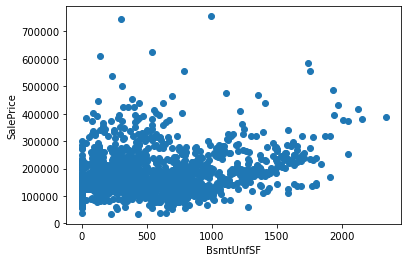

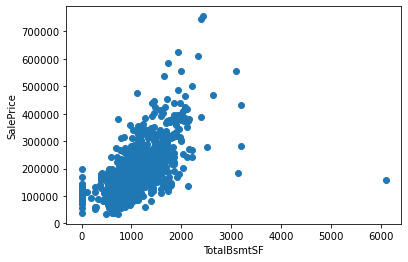

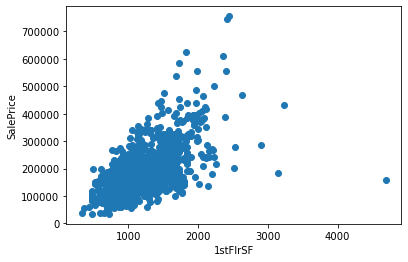

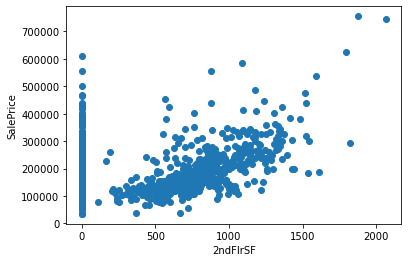

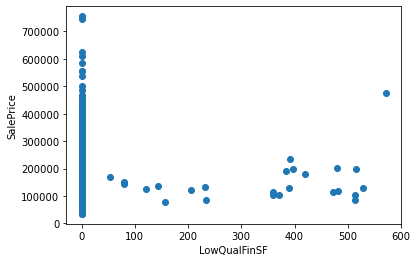

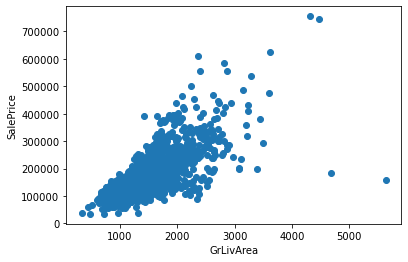

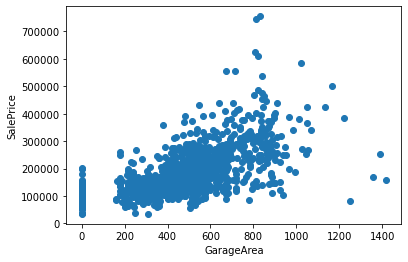

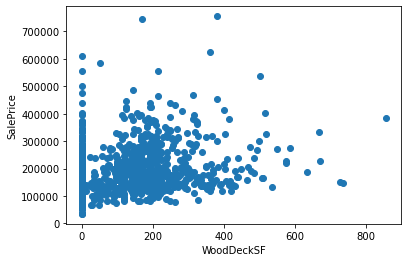

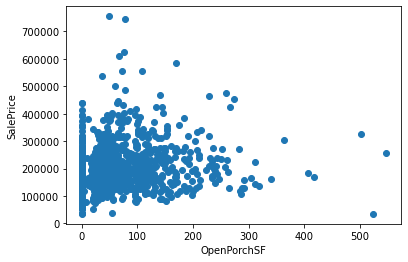

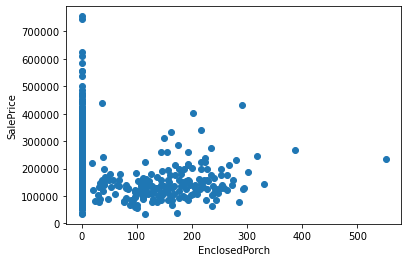

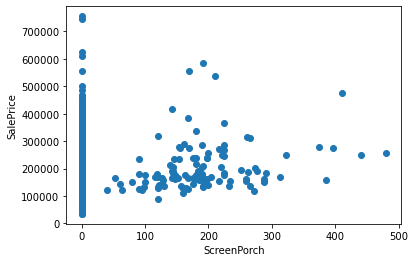

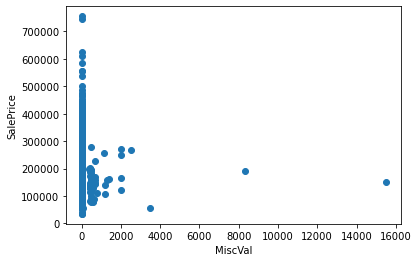

In [42]:
for i in numerical_cont[:17]:
    plt.scatter(house_train[i],house_train['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

## Relation Between Sale Price and Years

In [43]:
year_built = house_train['YearBuilt'].unique()
year_built

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [84]:
mean_price_yrbt = [house_train[house_train['YearBuilt'] == x]['SalePrice'].mean() for x in year_built ]

In [96]:
px.scatter(x = year_built, y = mean_price_yrbt, labels = {'x' : 'Year Built', 'y' : 'Mean Sale Price'})
# House built in 2010 have maximum price 
# house price decreases with age increases

In [45]:
house_train['YearBuilt'].iplot(kind = 'hist',bins = 75,layout = {'height' : 500,'width' : 700})

#MORE THAN 100 HOUSE WHICH WAS BUILT IN BETWEEN 2004 and 2005

In [47]:
year_sold = house_train['YrSold'].unique()

In [48]:
mean_price_yrsold = [house_train[house_train['YrSold'] == x ]['SalePrice'].mean() for x in year_sold ]

In [49]:
px.bar(x = year_sold,y = mean_price_yrsold,width=800, height=400,labels = {'x':'Year_sold','y':'Mean Sale Price'})

#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [50]:
year_remodel = house_train['YearRemodAdd'].unique()
year_remodel

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

In [51]:
a = [] ## filtering remodel houses
for i in range(1460):
    if house_train['YearBuilt'][i] != house_train['YearRemodAdd'][i]:
        a.append(house_train['YearRemodAdd'][i])

In [52]:
b = [] ## filtering remodel houses
for i in range(1460):
    if house_train['YearBuilt'][i] == house_train['YearRemodAdd'][i]:
        b.append(house_train['YearRemodAdd'][i])

In [53]:
len(a) # only 696 houses are remodeled

696

In [54]:
len(b) # house are not remodeled

764

In [55]:
year_not = []
for i in b:
    if i not in year_not:
        year_not.append(i)

In [56]:
year_remodel = []
for i in a:
    if i not in year_remodel:
        year_remodel.append(i)

In [57]:
price_notre = [house_train[(house_train['YearRemodAdd'] == x) & (house_train['YearBuilt'] == x)]['SalePrice'].mean() 
               for x in year_not]

In [58]:
price_remodel = [house_train[(house_train['YearRemodAdd'] == x) & (house_train['YearBuilt'] != x)]['SalePrice'].mean() 
               for x in year_remodel]

#### both remodel and not remodeled house price plots are look similar
**House Price decreases with house age increases

In [59]:
fig = make_subplots(rows = 1,cols=2)
fig.add_trace(go.Scatter(x=year_remodel, y=price_remodel,mode = 'markers'), row=1, col=1,)
fig.add_trace(go.Scatter(x=year_not, y=price_notre,mode = 'markers'),row=1, col=2)

fig.update_layout(title_text = 'Sale Price vs remodeled and not',height=400, width=800)

fig.update_xaxes(title_text = 'year_remodel',row = 1,col=1)
fig.update_xaxes(title_text = 'construction year(houses are not remodeled)',row = 1,col=2)
fig.update_yaxes(title_text = 'mean price',row = 1,col=1)
fig.update_yaxes(title_text = 'mean price',row = 1,col=2)


## Categorical Features

In [74]:
categorical_features = [x for x in house_train.columns if x not in discrete]

In [75]:
categorical_features = [x for x in categorical_features if len(house_train[x].unique())<20]

In [76]:
len(categorical_features)

52

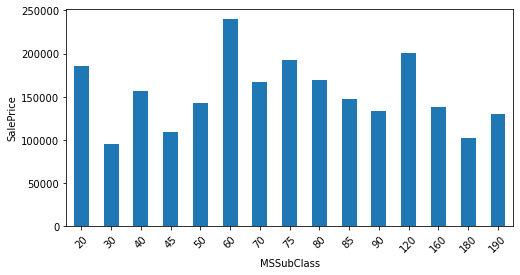

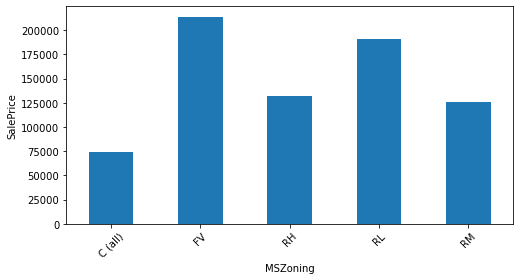

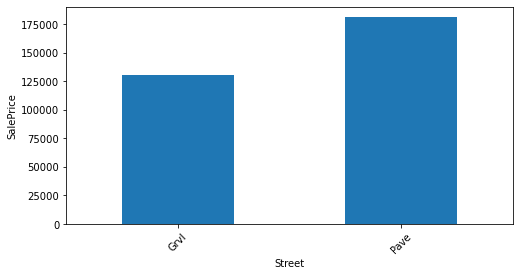

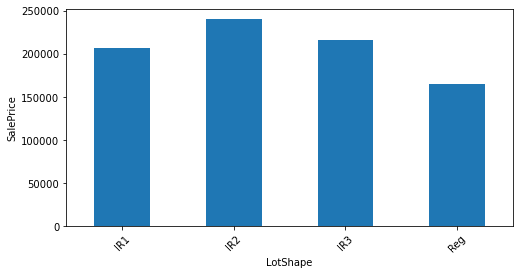

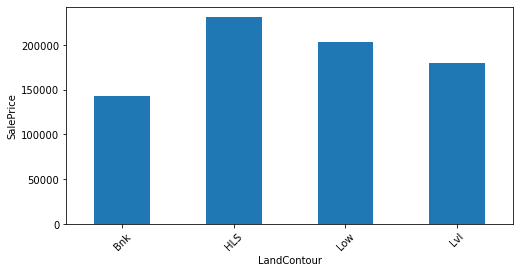

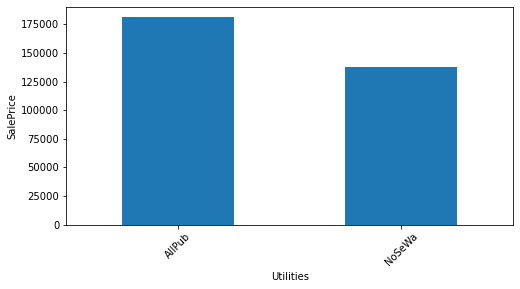

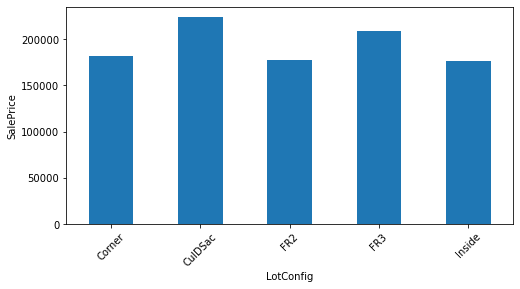

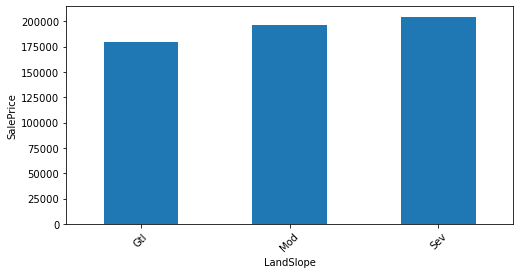

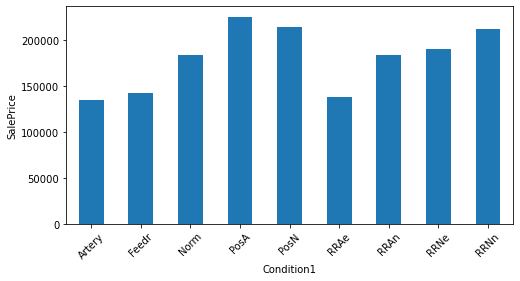

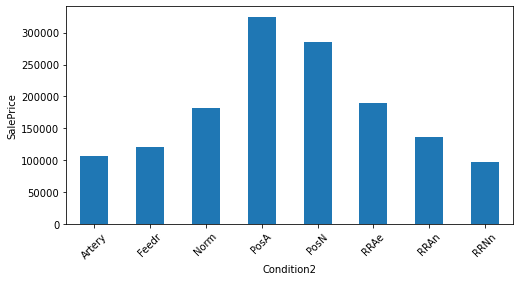

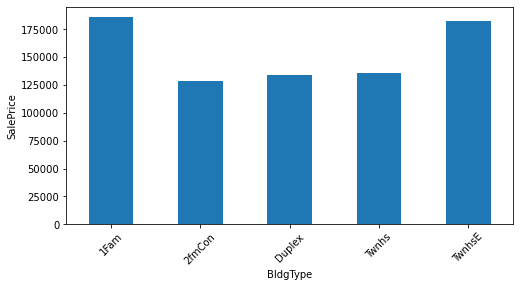

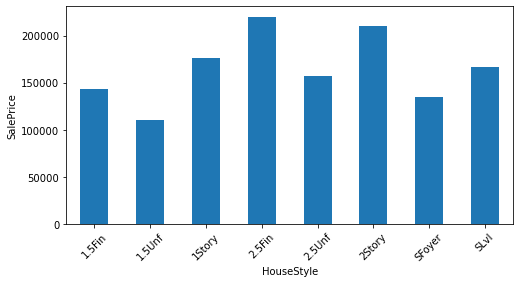

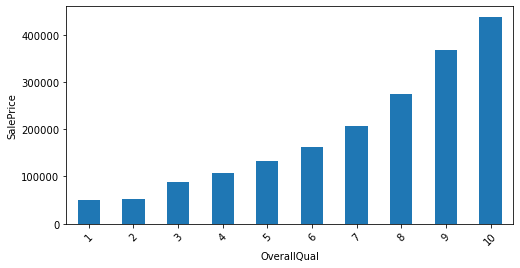

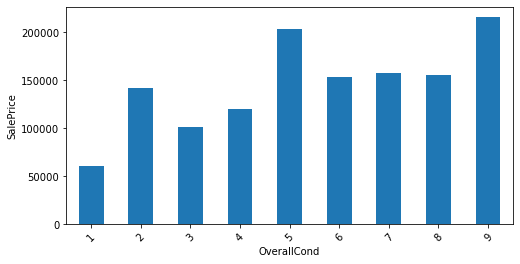

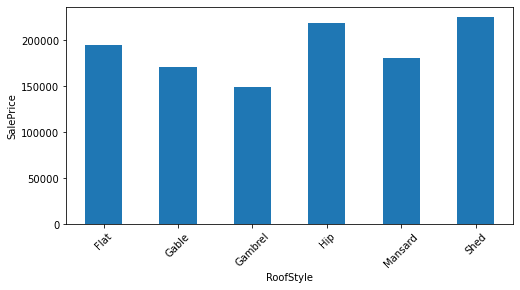

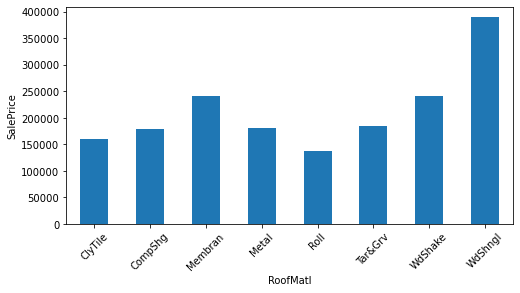

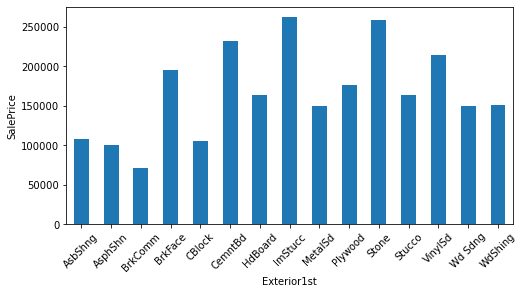

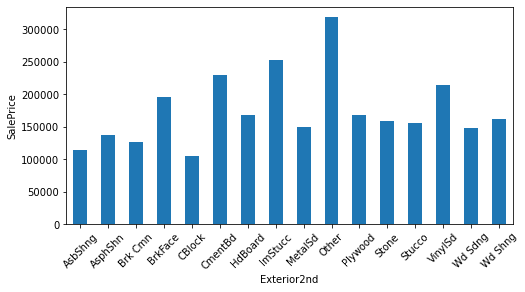

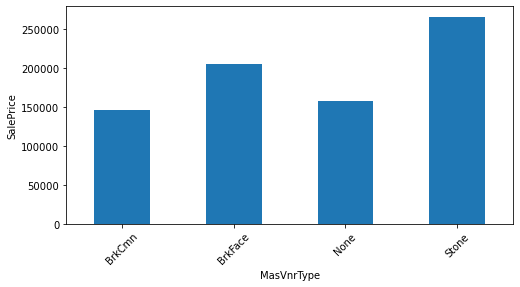

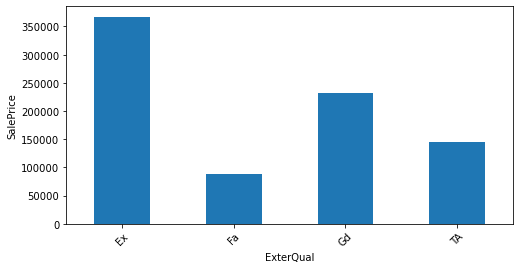

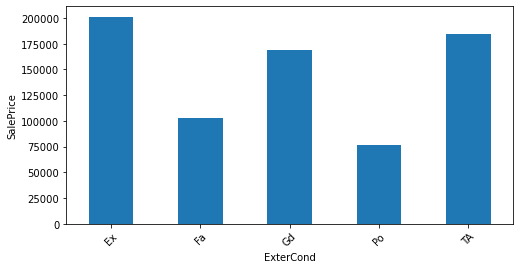

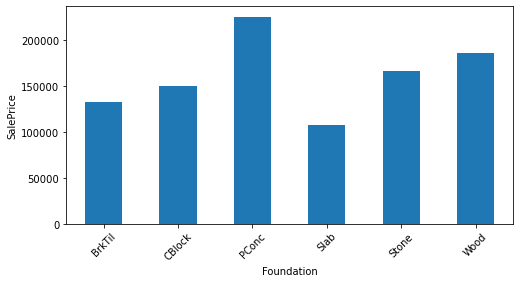

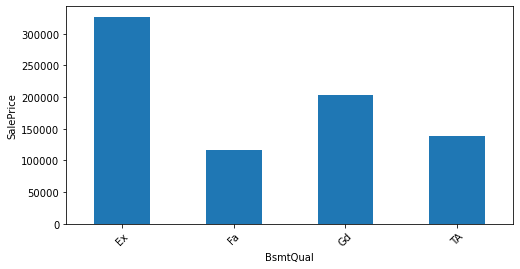

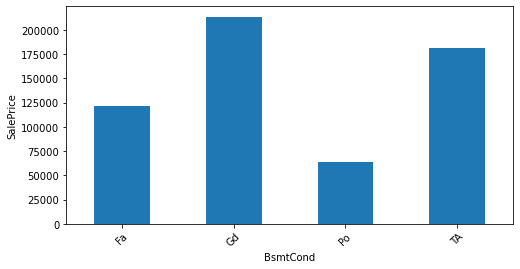

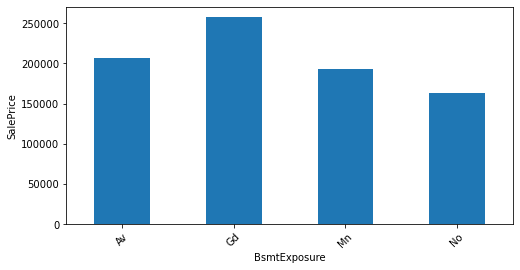

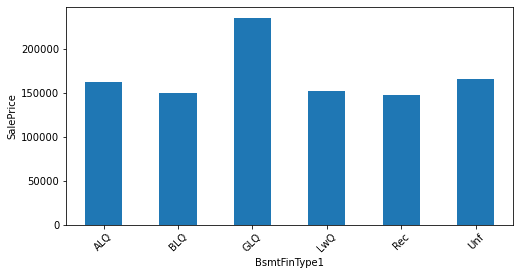

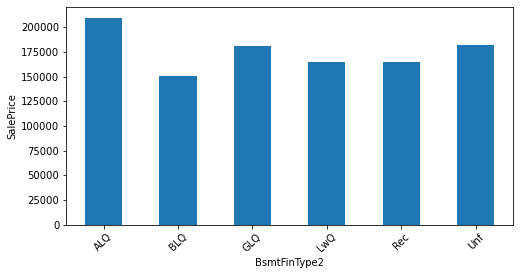

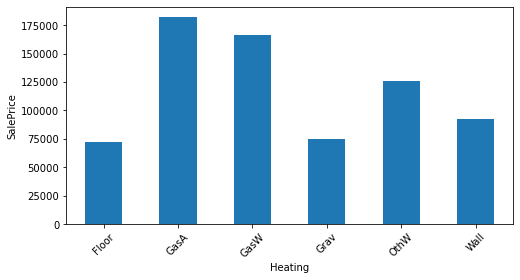

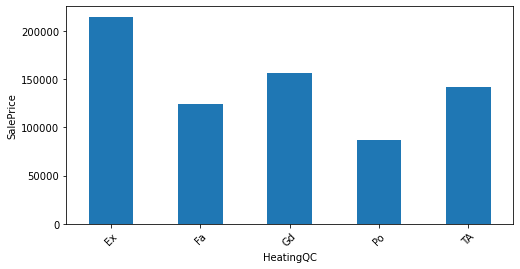

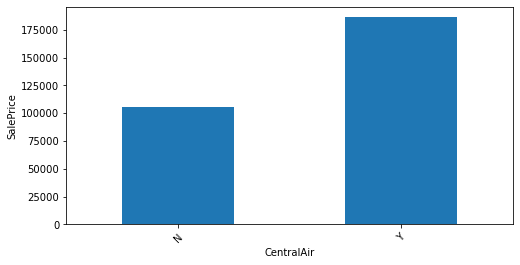

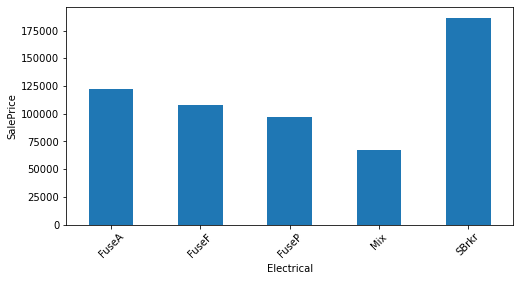

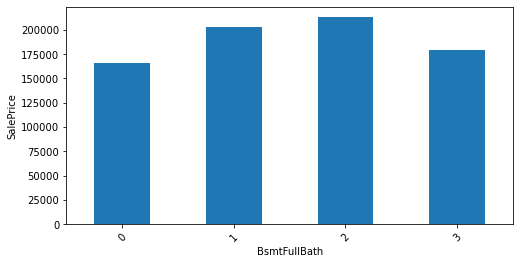

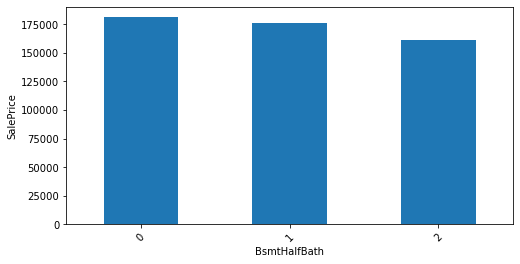

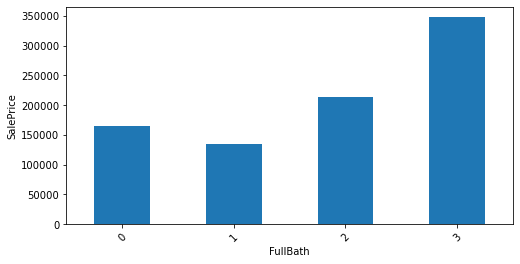

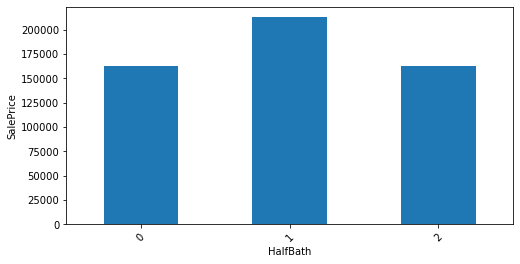

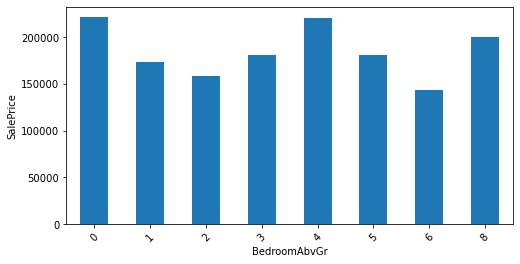

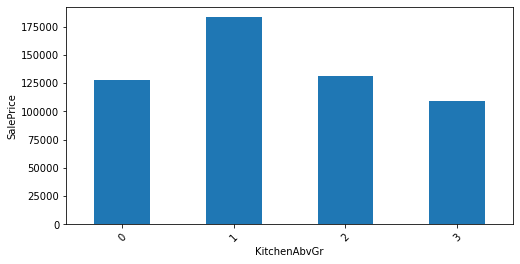

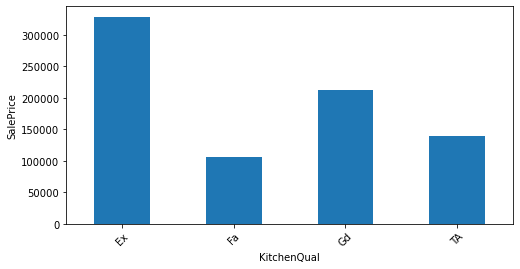

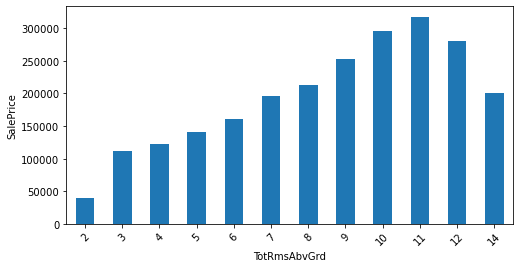

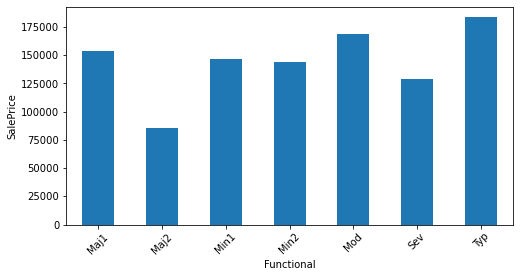

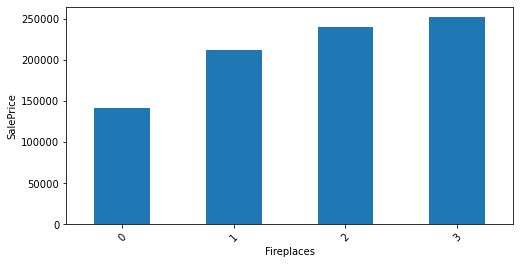

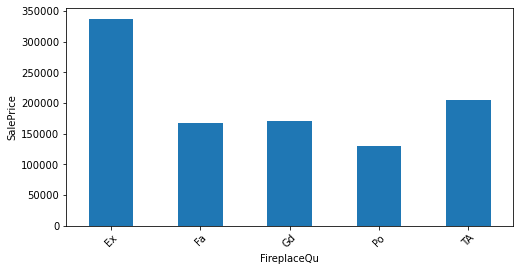

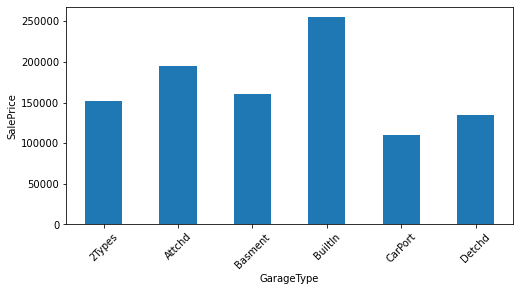

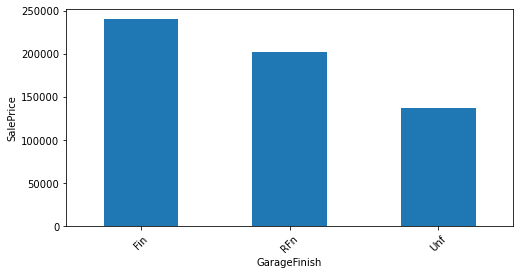

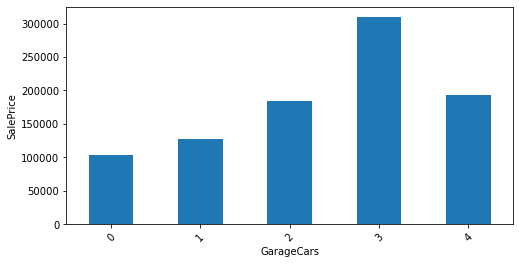

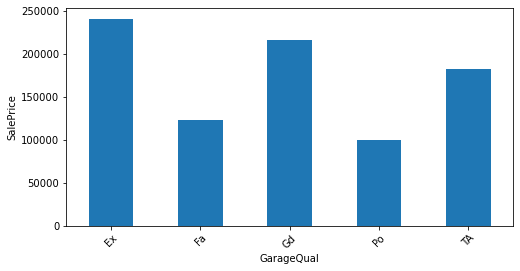

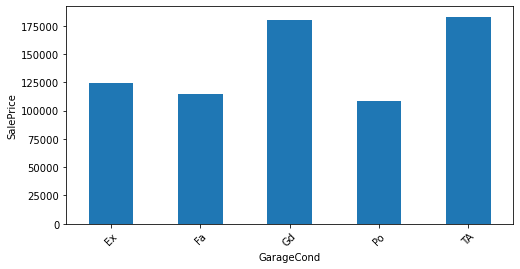

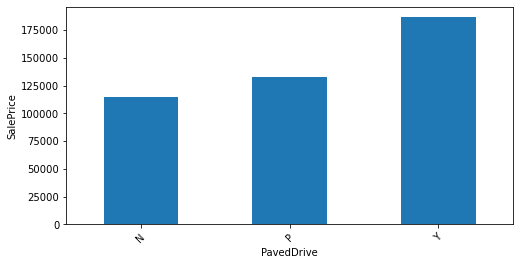

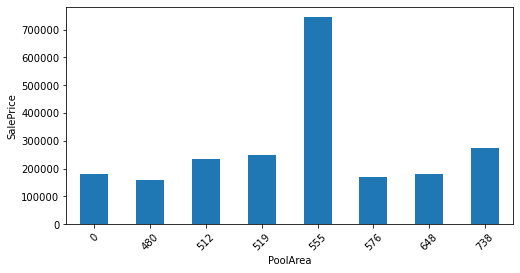

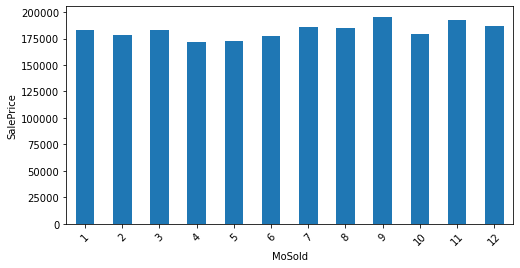

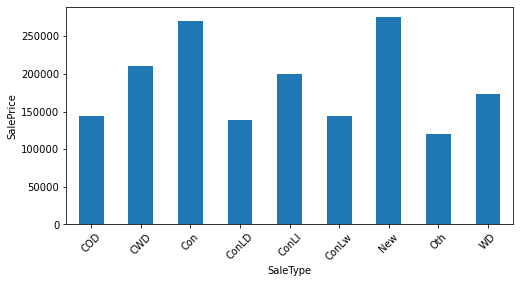

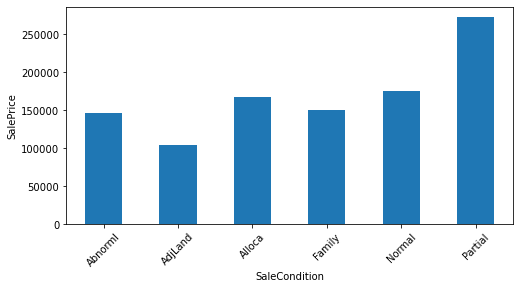

In [98]:
for i in categorical_features:
    plt.figure(figsize=(8,4))
    house_train.groupby(by = i)['SalePrice'].mean().plot.bar() # we can aslo use median 
    plt.xticks(rotation = 45)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()